# Exploring Unemployment Data with Covid-19
by Nico Purnomo 28/01/2020

This little notebook is a product of my interest in what Covid had done to the unemployment rates accross different countries. In this notebook, I will focus on looking at data and trying to use different visualisations tools such as plotly and seaborn. I will also provide simple insights and ideas.

## Unemployment, total (% of total labor force) (modeled ILO estimate)

Unemployment refers to the share of the labor force that is without work but available for and seeking employment.

### Data from International Labour Organization, ILOSTAT database. Data retrieved in September 20, 2020.
https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS

In [38]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Data from the World Bank https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS
df = pd.read_csv('CountriesUnemployment.csv')

# Look at data
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.488,11.508,11.534,11.448,11.387,11.313,11.184,11.057,11.118,11.164
2,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.362,7.379,7.400,7.331,7.282,7.223,7.119,7.019,6.886,6.774
3,Albania,ALB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,13.481,13.376,15.866,17.490,17.080,15.220,13.750,12.340,12.331,12.813
4,Andorra,AND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Look at the dimension of df
df.shape


(264, 65)

In [43]:
# I have decided to just explore the last 5 years
df = df[['Country Name', 'Country Code', '2016', '2017', '2018', '2019', '2020']]
df.head()
print(df.shape)


(264, 7)


In [44]:
# Drop rows without complete information, this is to make it cleaner. 
df = df.dropna(0)
print(df.shape)

(233, 7)


In [46]:
# Save country names
countries = df['Country Name'].unique()
df.describe()

,2016,2017,2018,2019,2020
count,233.000000,233.000000,233.000000,233.000000,233.000000
mean,7.526826,7.241588,6.953769,6.922998,6.934587
std,5.208816,5.030343,4.898098,4.864850,4.829946
min,0.150000,0.140000,0.110000,0.091000,0.082000
25%,4.242000,4.098000,3.852769,3.889744,3.897888
50%,6.140834,5.760000,5.520643,5.527787,5.552639
75%,9.720000,9.316000,9.027000,8.801000,8.934000
max,26.551001,27.070999,26.920000,28.181000,28.476999


In [53]:
df.columns.values[2:]
df.mean()

2016    7.526826
2017    7.241588
2018    6.953769
2019    6.922998
2020    6.934587
dtype: float64

## Insights
We can see that the mean of unemployment rates accross countries has been decreasing in trend until 2020, when the coronavirus made its appearance earlier in the year. The increase of the mean rate is marginal, but it is close to where we were in 2018. Unemployment rates is one measure to look at the country's standard of living.

To have a better look, I have created a simple line plot below.

Text(0.5, 0, 'Year')

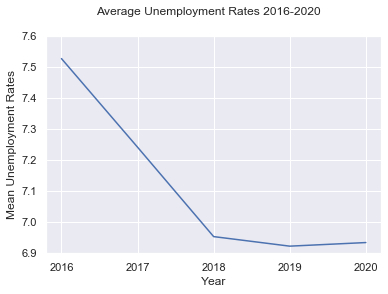

In [72]:
years = df.columns.values[2:]
means = df.mean()
plt.plot(years, means)
axes = plt.gca()
axes.set_ylim([6.9,7.6])
plt.suptitle('Average Unemployment Rates 2016-2020')
plt.ylabel('Mean Unemployment Rates')
plt.xlabel('Year')


In [73]:
# Try to project our data on a movable globe-like diagram for better visuals
# Thanks to https://www.kaggle.com/arthurtok/generation-unemployed-interactive-plotly-visuals/data
metricscale1=[[0, 'rgb(102,194,165)'], [0.05, 'rgb(102,194,165)'], 
              [0.15, 'rgb(171,221,164)'], [0.2, 'rgb(230,245,152)'], 
              [0.25, 'rgb(255,255,191)'], [0.35, 'rgb(254,224,139)'], 
              [0.45, 'rgb(253,174,97)'], [0.55, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]
data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = metricscale1,
        showscale = True,
        locations = df['Country Name'].values,
        z = df['2019'].values,
        locationmode = 'country names',
        text = df['Country Name'].values,
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Unemployment\nRate')
            )
       ]

layout = dict(
    title = 'World Map of Global Unemployment in the Year 2019',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        #oceancolor = 'rgb(222,243,246)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2019')

metricscale2=[[0, 'rgb(102,194,165)'], [0.05, 'rgb(102,194,165)'], 
              [0.15, 'rgb(171,221,164)'], [0.2, 'rgb(230,245,152)'], 
              [0.25, 'rgb(255,255,191)'], [0.35, 'rgb(254,224,139)'], 
              [0.45, 'rgb(253,174,97)'], [0.55, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]
data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = metricscale2,
        showscale = True,
        locations = df['Country Name'].values,
        z = df['2020'].values,
        locationmode = 'country names',
        text = df['Country Name'].values,
        marker = dict(
            line = dict(color = 'rgb(250,250,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Unemployment\nRate')
            )
       ]

layout = dict(
    title = 'World Map of Global Unemployment in the Year 2020',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(202, 202, 202)',
                width = '0.05'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2020')

In [13]:
# Make Scatter plots for unemployment rates in 2019 and 2020 by their coutries' alphabetical order.
# Thanks to https://www.kaggle.com/arthurtok/generation-unemployed-interactive-plotly-visuals/data
# Scatter plot of 2019 unemployment rates
trace = go.Scatter(
    y = df['2019'].values,
    mode='markers',
    marker=dict(
        size= df['2019'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = df['2019'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = df['Country Name'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter Plot of Unemployment Rates in 2019 (x = Index, y = rates)',
    hovermode= 'closest',
   xaxis= dict(
        title= 'Country Index by alphabetical order',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2019')

# Scatter plot of 2020 unemployment rates
trace1 = go.Scatter(
    y = df['2020'].values,
    mode='markers',
    marker=dict(
        size=df['2020'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = df['2020'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = df['Country Name'].values
)
data = [trace1]

layout= go.Layout(
    title= 'Scatter Plot of Unemployment Rates in 2020 (x = Index, y = rates)',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Country Index by Alphabetical Order',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2020')

In [80]:
# Boxplots For 2018, 2019, 2020 unemployment rates to have a better look at the distributions and central tendencies.
# Thanks to https://www.kaggle.com/abhi084/analysis-of-unemployment-data

x_data = ['2018', '2019','2020']

y0 = df['2018']
y1 = df['2019']
y2 = df['2020']


y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)']

traces = []

for xd, yd, color in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            whiskerwidth=0.2,
            fillcolor=color,
            marker=dict(
                size=2,
            ),
            boxmean=True,    
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Unemployment Data in 2018, 2019, and 2020',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Unemployment Rate (%)',
        autorange=True,
        showgrid=True,
        zeroline=False,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
#        zerolinecolor='rgb(255, 255, 255)',
#        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

Now, I would like to see the changes of these rates from one year to another. I am hoping to see that the changes in 2019-2020 will be dominated by positive changes as it will explain the rise of unemployment rates. I will compare this to the changes from 2018-2019

In [79]:
# Create columns for the changes between years 2020-2019 and 2019-2018.

df['2020-2019 change']=df['2020']-df['2019']
df['2019-2018 change']=df['2019']-df['2018']



In [77]:
# Count the positive and negative changes.

print('Number of negative changes in 2019 = ', sum(n < 0 for n in df['2019-2018 change']))
print('Number of positive changes in 2019 = ', sum(n > 0 for n in df['2019-2018 change']))
print('Number of negative changes in 2020 = ', sum(n < 0 for n in df['2020-2019 change']))
print('Number of positive changes in 2020 = ', sum(n > 0 for n in df['2020-2019 change']))



Number of negative changes in 2019 =  106
Number of positive changes in 2019 =  127
Number of negative changes in 2020 =  89
Number of positive changes in 2020 =  144


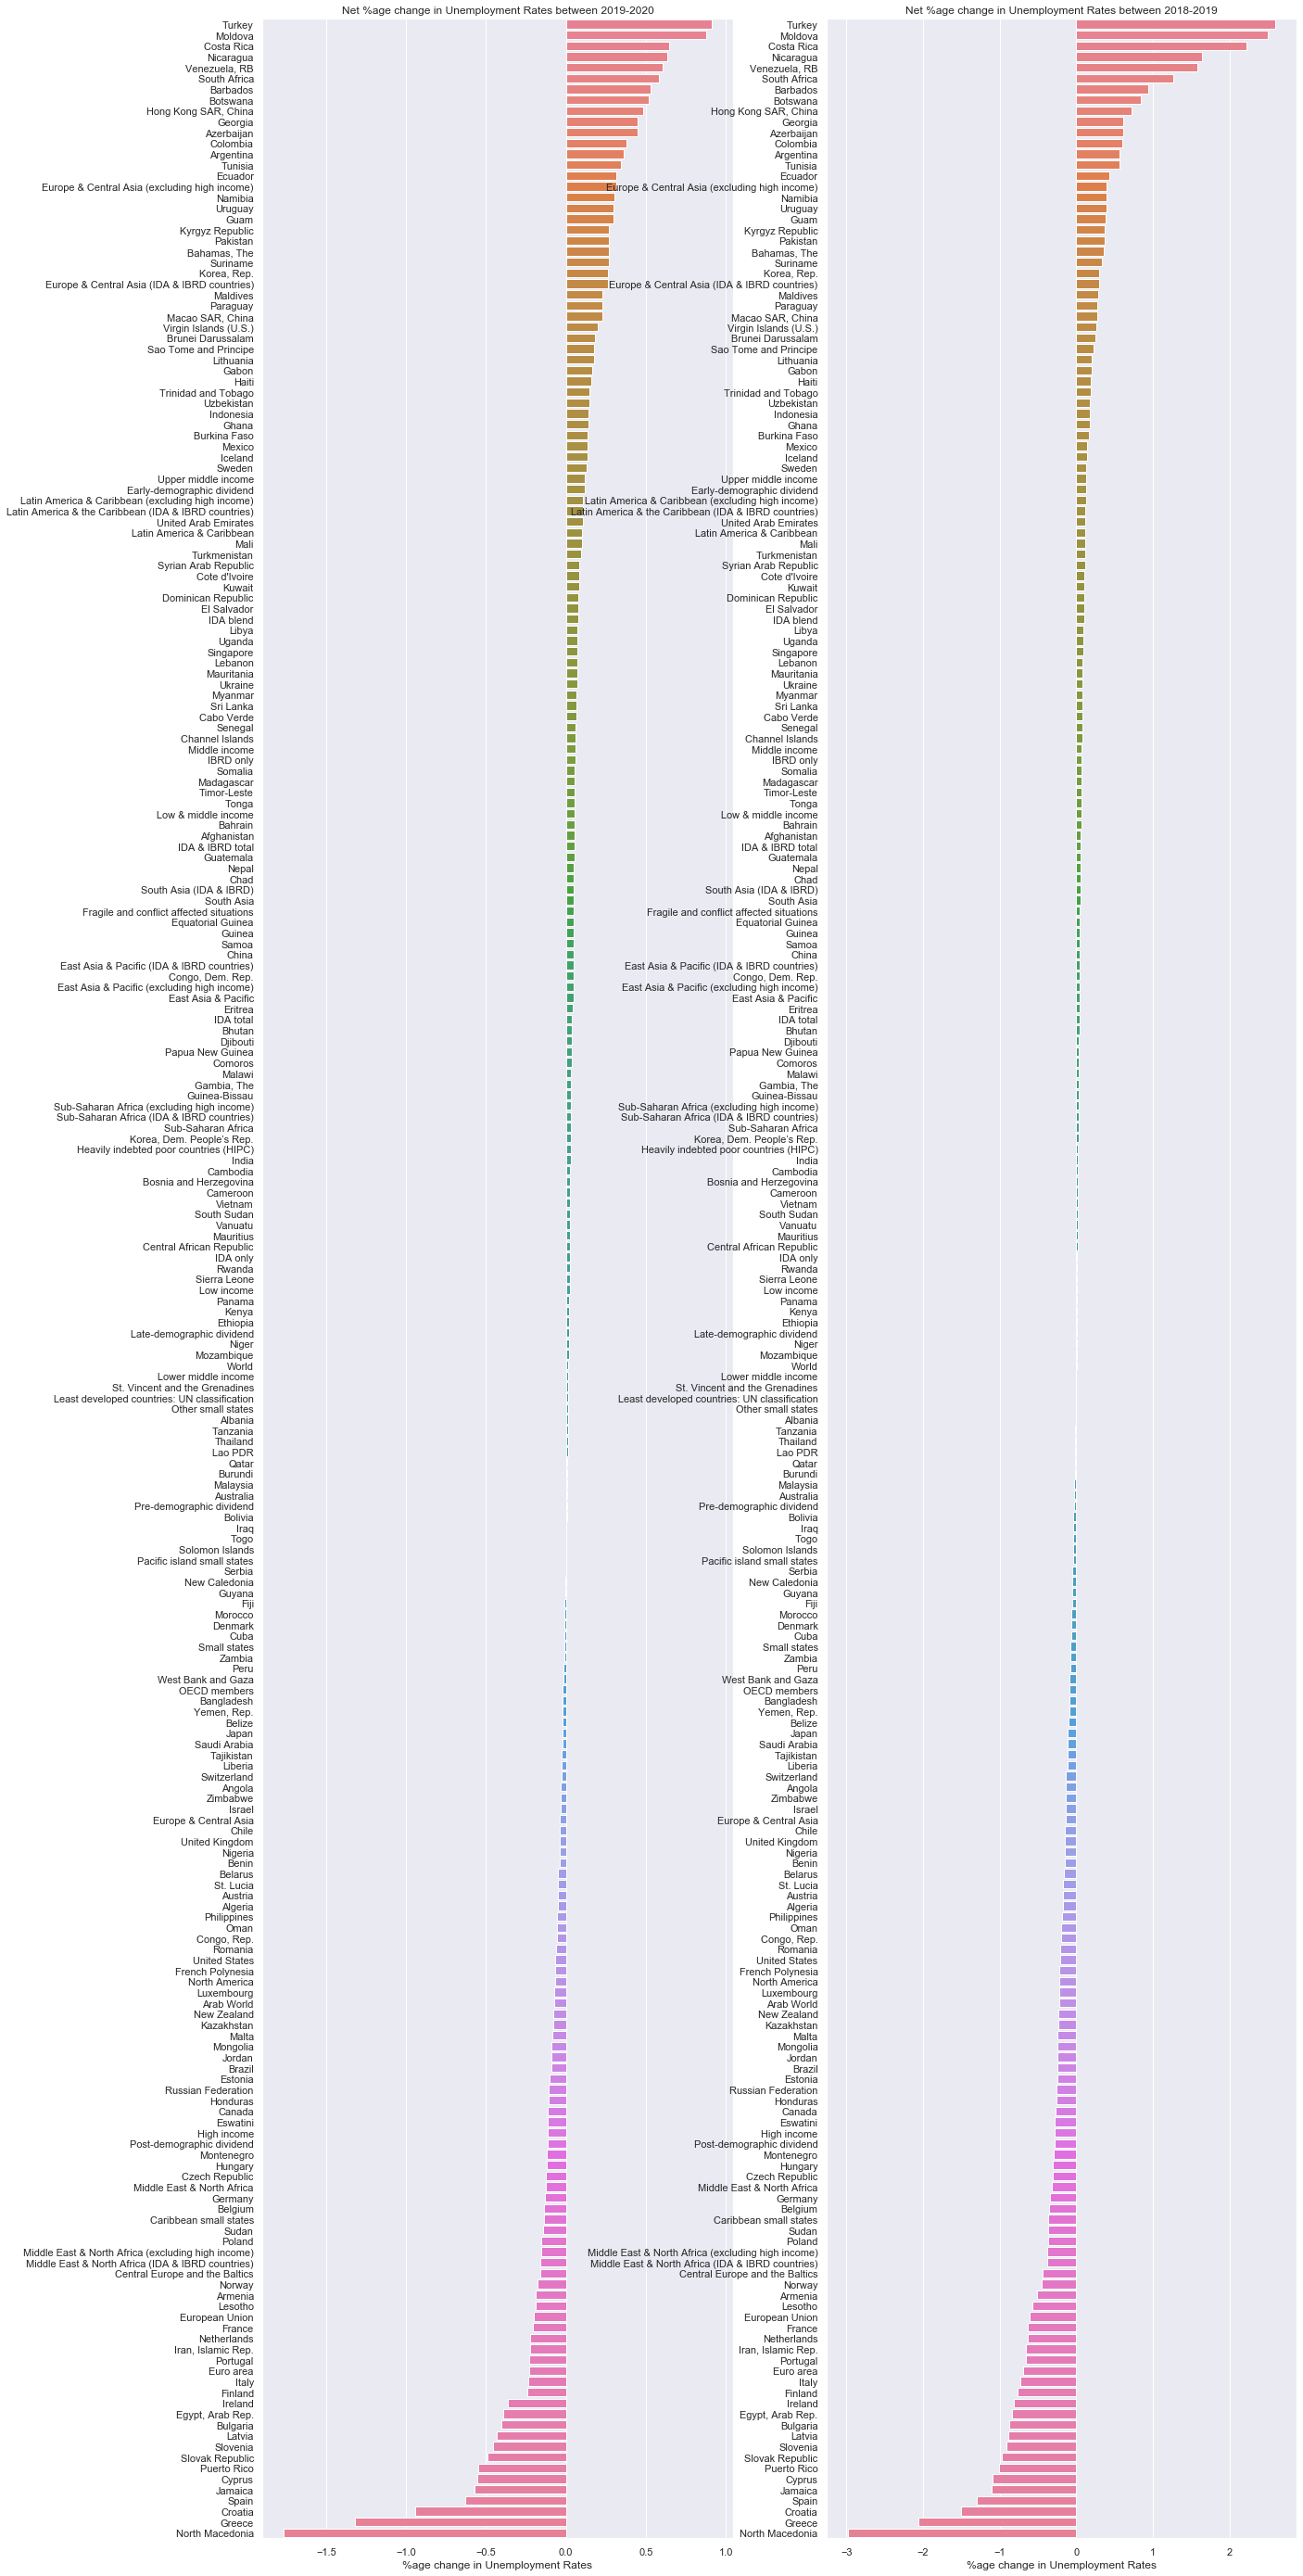

In [78]:
# I would like to see this changes visually so I try to make a bar chart that would better represent the changes of unemployment rates.
# Thanks to https://www.kaggle.com/abhi084/analysis-of-unemployment-data
ayearchange1920_bar, countries_bar1 = (list(x) for x in zip(*sorted(zip(df['2020-2019 change'], df['Country Name']), 
                                                             reverse = True)))
ayearchange1819_bar, countries_bar1 = (list(x) for x in zip(*sorted(zip(df['2019-2018 change'], df['Country Name']), 
                                                             reverse = True)))


# Another direct way of sorting according to values is creating distinct sorted dataframes as in below commented ways and then
# passing their values directly as in below mentioned code to achieve the same effect as by above mentioned method.

# df_country_sorted=df_country.sort(columns='2014-2012 change',ascending=False)
# df_country_sorted.head()


sns.set(font_scale=1) 
fig, axes = plt.subplots(1, 2, figsize=(20, 50))
colorspal = sns.color_palette('husl', len(df['2020']))
sns.barplot(ayearchange1920_bar, countries_bar1, palette = colorspal, ax = axes[0])
sns.barplot(ayearchange1819_bar, countries_bar1, palette = colorspal, ax = axes[1])
axes[0].set(xlabel='%age change in Unemployment Rates', title='Net %age change in Unemployment Rates between 2019-2020')
axes[1].set(xlabel='%age change in Unemployment Rates', title='Net %age change in Unemployment Rates between 2018-2019')
fig.savefig('output.png')


In [95]:
#Testing a function to sort by the changes
top15 = df.sort_values(by = '2020-2019 change', ascending=True).head(15)

top15

,Country Name,Country Code,2016,2017,2018,2019,2020,2020-2019 change,2019-2018 change
87,Greece,GRC,23.539000,21.488001,19.292000,17.238001,15.474000,-1.764001,-2.053999
155,North Macedonia,MKD,23.724001,22.381001,20.736000,17.759001,16.438999,-1.320002,-2.976999
68,Spain,ESP,19.635000,17.224001,15.255000,13.959000,13.015000,-0.943999,-1.296000
65,"Egypt, Arab Rep.",EGY,12.407000,11.737000,11.592000,10.760000,10.128000,-0.632000,-0.832000
139,Lesotho,LSO,24.299999,24.134001,23.971001,23.405001,22.830999,-0.574001,-0.566000
131,St. Lucia,LCA,21.263000,21.069000,20.879000,20.705999,20.150000,-0.556000,-0.173000
242,Turkey,TUR,10.839000,10.819000,10.890000,13.490000,12.941000,-0.549000,2.599999
19,Bulgaria,BGR,7.575000,6.164000,5.211000,4.340000,3.850000,-0.490000,-0.871000
219,Slovak Republic,SVK,9.670000,8.131000,6.536000,5.561000,5.104000,-0.457000,-0.975000
188,Poland,POL,6.161000,4.887000,3.845000,3.474000,3.040000,-0.434000,-0.371000


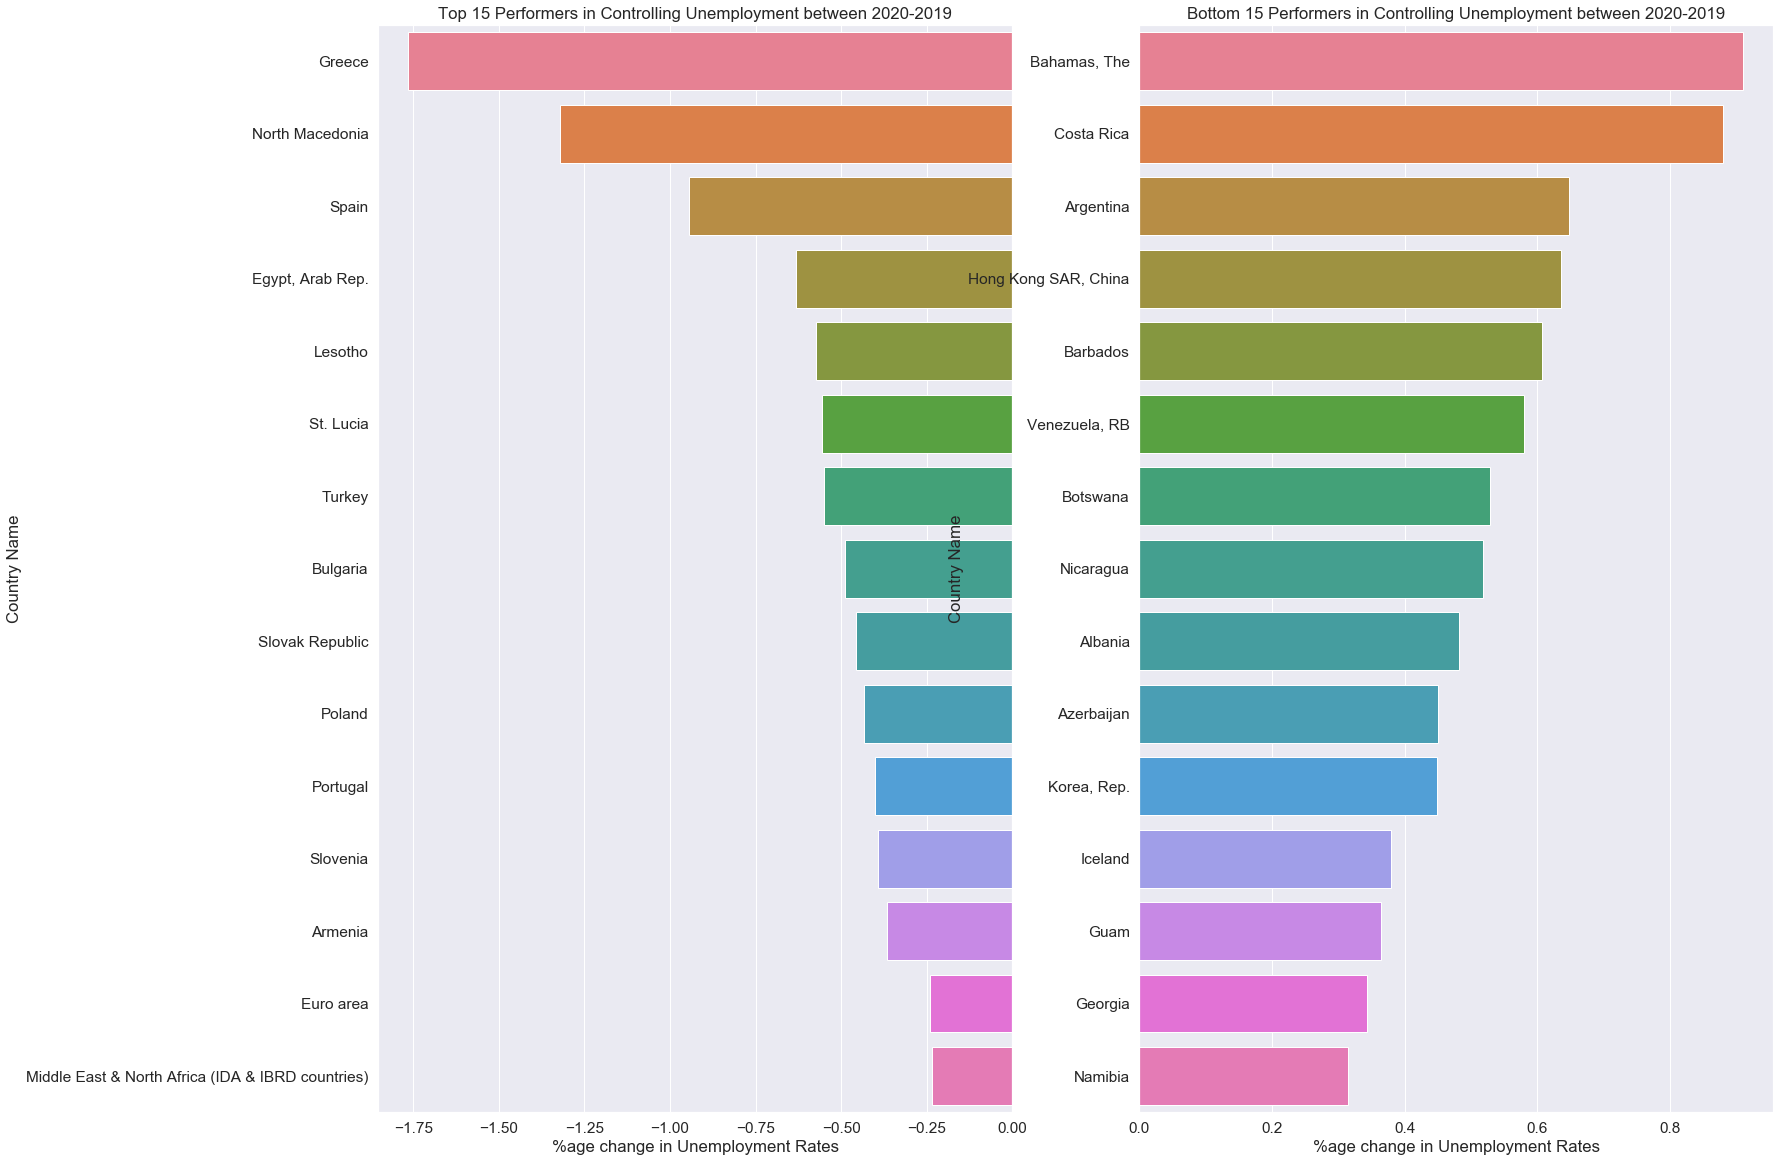

In [96]:
# Create horizontal bar plots for best and worst performers in terms of changes in unemployment rates 2019-2020
def top_successful_1(df,n=10,column='2020-2019 change'):
    return df.sort_values(by=column,ascending=True).head(n)

def top_failure_1(df,n=10,column='2020-2019 change'):
    return df.sort_values(by=column,ascending=False).head(n)

top15=top_successful_1(df,n=15)
bottom15=top_failure_1(df,n=15)

sns.set(font_scale=1.4) 
fig, axes = plt.subplots(1,2,figsize=(25, 20))
colorspal = sns.color_palette('husl', len(top15['2020']))
sns.barplot(top15['2020-2019 change'], top15['Country Name'], palette = colorspal,ax=axes[0])
sns.barplot(bottom15['2020-2019 change'], bottom15['Country Name'], palette = colorspal,ax=axes[1])
axes[0].set(xlabel='%age change in Unemployment Rates', title='Top 15 Performers in Controlling Unemployment between 2020-2019')
axes[1].set(xlabel='%age change in Unemployment Rates', title='Bottom 15 Performers in Controlling Unemployment between 2020-2019')
fig.savefig('output1.png')

## Insights
We can see from the plot that Greece, North Macedonia, and Spain have the most decrease in unemployment rates compared to other countries (-1.75%, -1.3%, & -0.9% respectively). They have somehow prevailed and it seems that Covid-19 did not affect them that much in terms of unemployment. This can be linked to their governments' initiatives in keeping their economies open and more relaxed lockdown measures.

The 3 worst countries' unemployoment rates affected by Covid-19 are The Bahamas, Costa Rica, and Argentina (+0.9%. +0.85%, & +0.63% respectively). These 3 coutries are located in Latin America and share similar cultures amd dependecies to exports. Falling prices of commodities exports has been the culprit as it has reduced the countries' fiscal capacity to ameliorate the virus' impacts. The government choices of lockdowns and other measures may have affected the rates as well. 

"The LAC region’s structural dependence on commodity exports, mainly originating from developed economies, has also reduced and severely impacted their recuperation cycle."
https://www.orfonline.org/expert-speak/covid19-lofty-economic-recovery-latin-america/

There are definitely other factors that may have caused this, but coronavirus remained as the number one reason. 

